# <span style='font-family:"Times New Roman"'> <span styel=''> **DATA DISCOVERY**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*February 2020*

**Goal:** In this Notebook, we try to give a first view of the maf file created with the *../dataframe_generation/maf_creation.ipynb* script. This is a descriptive notebook.
    
The Notebook is divided in 3 parts:
   
* **1. Basic Analysis**
* **2. TP53 Mutations (Pan Analysis)**
* **3. TP53 Mutations (Per Cancer)**

**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

In [7]:
%run -i '../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [2]:
maf_tp53 = pd.read_pickle(data_path + 'merged_data/maf_tp53.pkl')
cohort = pd.read_csv(data_path + 'impact-facets-tp53/raw/default_qc_pass.cohort.txt', sep='\t')
maf_cohort = pd.read_pickle(data_path + 'merged_data/maf_cohort.pkl')
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')

## Basic Analysis

In [3]:
print('Number of samples in the cohort: ' + str(len(set(master.Tumor_Id))))
print('Number of patients in the cohort: ' + str(len(set(master.Patient_Id))))
print('Number of patients with mutated TP53: ' + str(len(master[master['tp53_count']>=1])))
print('Proportion of tp53 mutated patients in the cohort: ' + str(round(100*12731/29259,1)) + '%')

Number of samples in the cohort: 29259
Number of patients in the cohort: 27021
Number of patients with mutated TP53: 12731
Proportion of tp53 mutated patients in the cohort: 43.5%


In [139]:
get_groupby(master[master['tp53_count'] >= 1], 'Sample_Type', 'count')
5505/(5505+7226)

0.43240908019794205

,count
Cancer_Type,
Non-Small Cell Lung Cancer,4228
Breast Cancer,4148
Colorectal Cancer,2972
Prostate Cancer,1595
Glioma,1581
Pancreatic Cancer,1485
Melanoma,1094
Endometrial Cancer,1042
Soft Tissue Sarcoma,1039


count    28424
dtype: int64


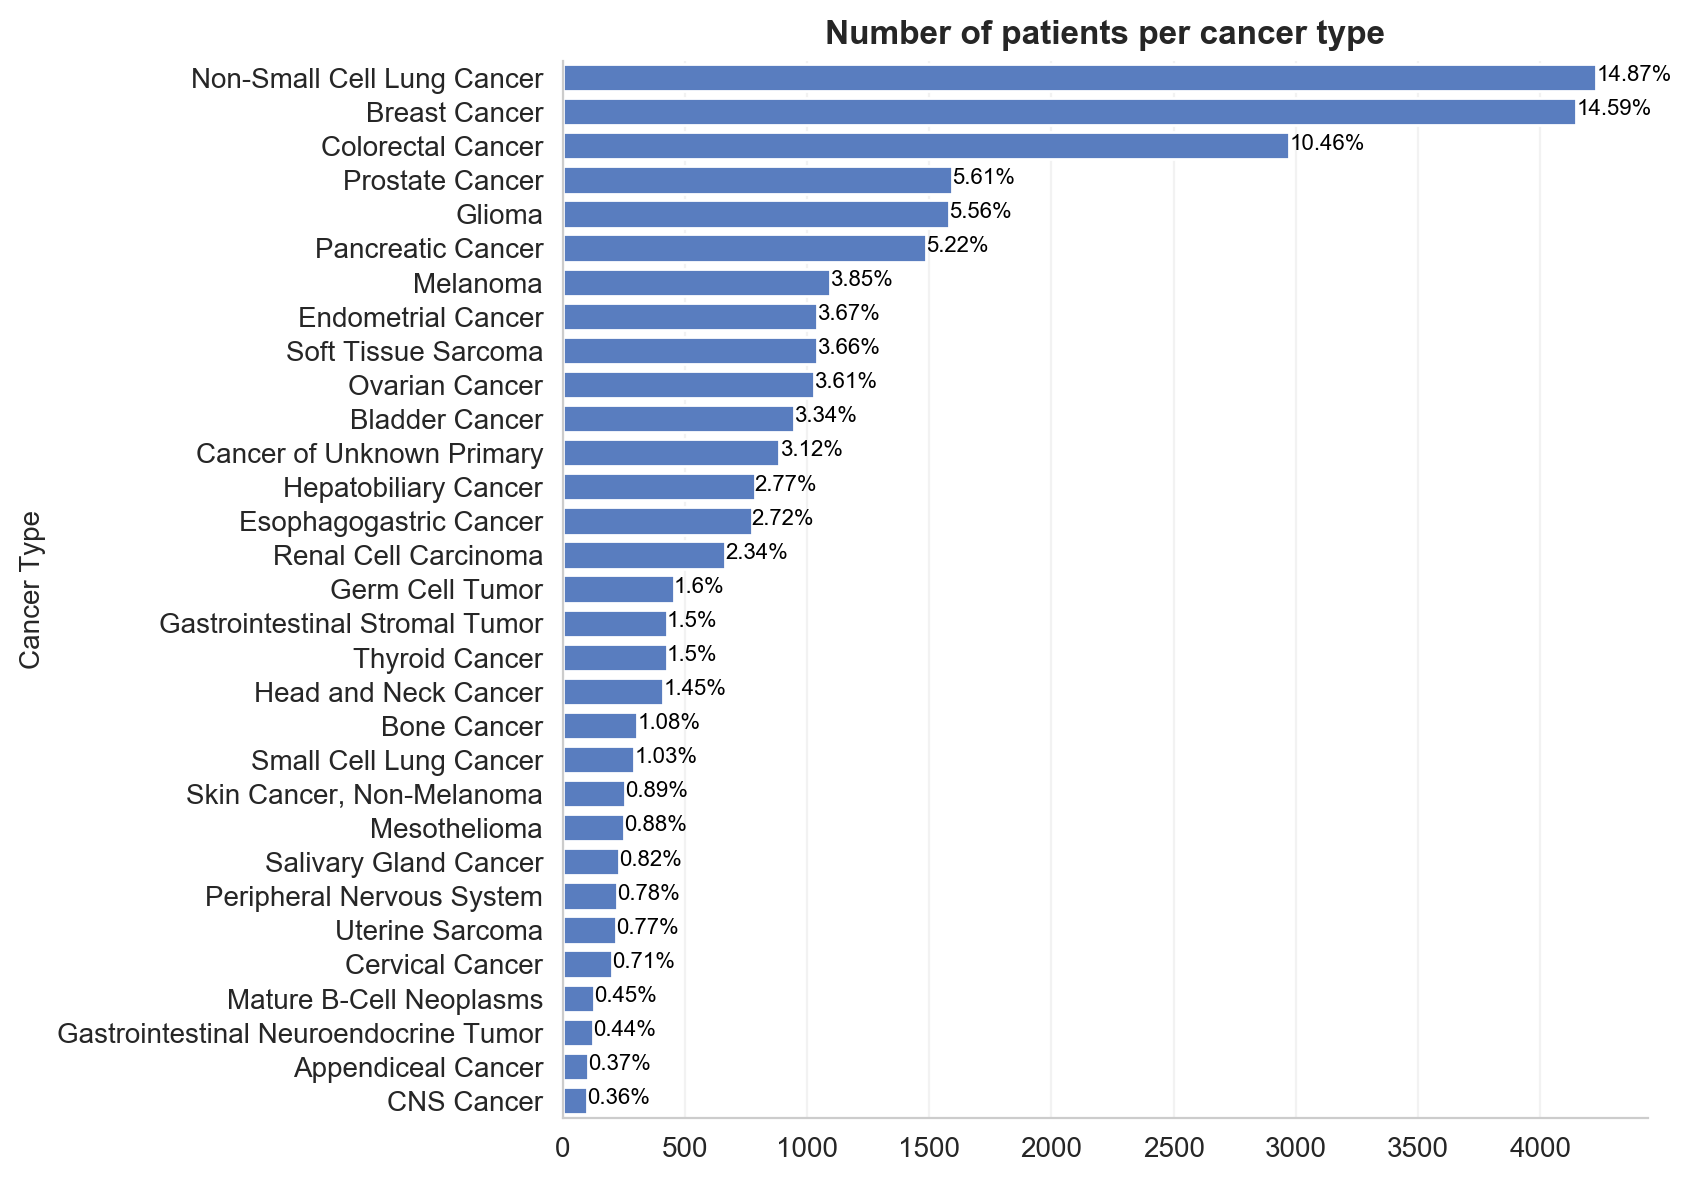

In [129]:
# Counting mutations per patient
cancer_count = pd.DataFrame(master[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns = ['count'])
# We select only cancers with more than 100 patients
cancer_count = cancer_count[cancer_count['count'] >= 100]
#Sorting the count
cancer_count = cancer_count.sort_values(by=['count'], ascending=False)

display(cancer_count)
print(cancer_count.sum())

#plot
get_ploth(cancer_count.index, 'count', cancer_count, 'Cancer Type', '','Number of samples per cancer type',figsize=(7,7), perc=True)

,count
Cancer_Type,
Non-Small Cell Lung Cancer,2211
Colorectal Cancer,2156
Breast Cancer,1536
Pancreatic Cancer,993
Ovarian Cancer,772
Esophagogastric Cancer,559
Glioma,542
Endometrial Cancer,504
Prostate Cancer,475


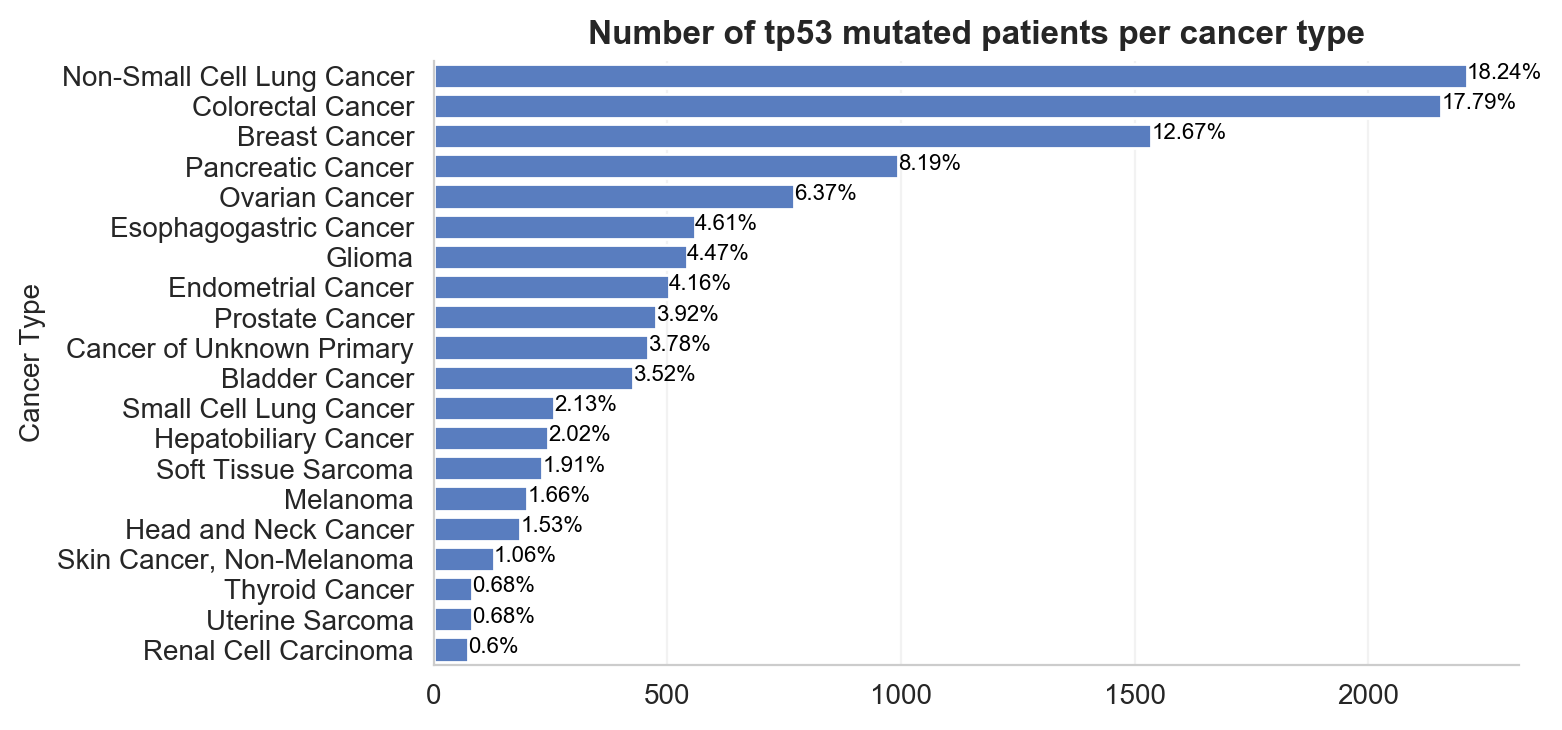

In [131]:
master_tp53 = master[master['tp53_count'] >= 1]
# Counting mutations per sample
cancer_count = pd.DataFrame(master_tp53[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns = ['count'])
# We select only cancers with more than 100 patients
cancer_count = cancer_count[cancer_count['count'] >= 70]
#Sorting the count
cancer_count = cancer_count.sort_values(by=['count'], ascending=False)

display(cancer_count)

#plot
get_ploth(cancer_count.index, 'count', cancer_count, 'Cancer Type', '','Number of tp53 mutated patients per cancer type',figsize=(7,4), perc=True)

---
The tp53 mutated cohort is composed of 53 different cancer types. 16 cancer types are composed of more than 100 samples.

From:
* **Skin Cancer, Non-Melanoma:** 129 samples

To:
* **Non-Small Cell Lung Cancer:** 2 211 samples


## TP53 Mutations (Pan Cancer Analysis)

In this section, we analyse the number of mutations per patient without considering the cancer type. Then we make the difference between primary and metastatic samples.

,prim_count,met_count
tp53_count,,
5,3,1
4,14,3
3,67,29
2,593,304
1,6549,5168


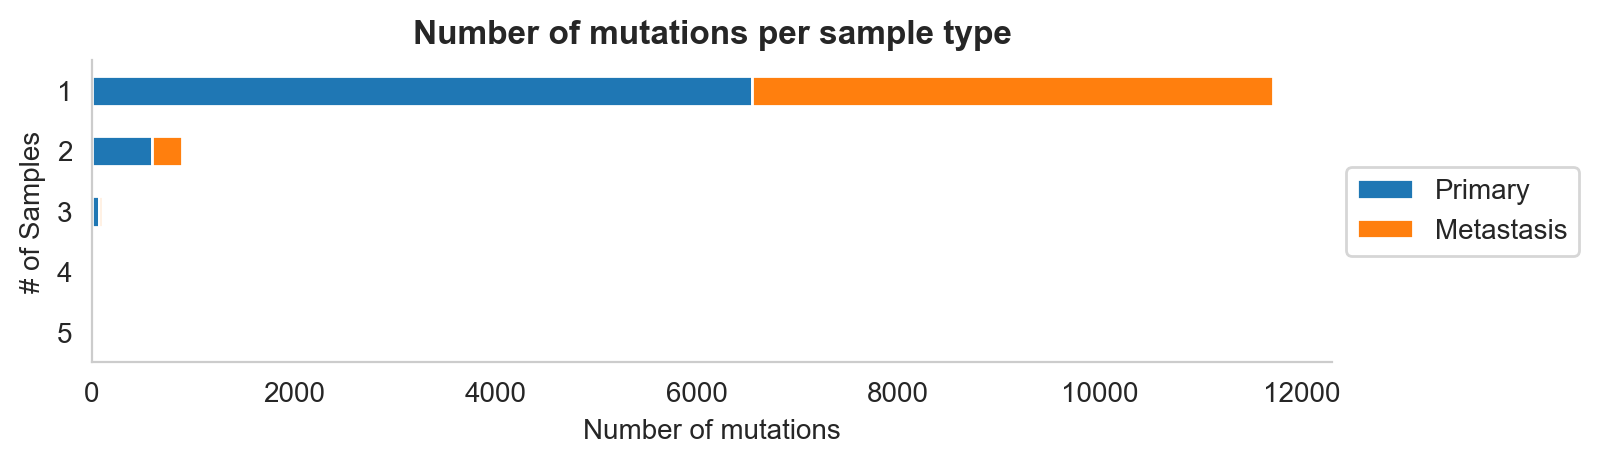

In [19]:
master_tp53 = master[master['tp53_count'] >= 1]
# We filter out the duplicates and keep only the Primary Samples
master_tp53_prim = master_tp53[master_tp53['Sample_Type']=='Primary']
master_tp53_met = master_tp53[master_tp53['Sample_Type']=='Metastasis']

# COunting
count_prim = get_groupby(master_tp53_prim, 'tp53_count', 'prim_count')
count_met = get_groupby(master_tp53_met, 'tp53_count', 'met_count')

#We rename the column
count = pd.concat([count_prim, count_met], axis=1).sort_values(by=['prim_count'])
display(count)

#get_plotv('count', count.index, count, 'Number of samples', 'Number of mutations','Number of tp53 mutations per sample in Primary Samples',figsize=(7,7), perc=True)

get_mstacked_plot(count, 
                  'Number of mutations per sample type',
                  ['Primary', 'Metastasis'],
                  'Number of mutations',
                  '# of Samples',
                  figsize = (10,2),
                  vert=True)

---
**Conclusion:** the plots show that **90 %** of tp53 mutated patients have only one hit. Moreover, primary samples are enriched in multiple hits in comparison with Metastatic samples (**8.56 %** and **5.51 %** of double hits respectively)

---

## TP53 Mutations (Per Cancer)

In [25]:
def get_numberhits(string, threshold):
    '''
    We define the function get_numberhits that allows to compute the df of the distribution of multiple hits for 
    each cancer for all samples, metastasis samples and primary samples.
    Aruments:
        - string: string that determines if we filter on Sample_Type
        - threshold: integer that determines the minimal number of mutations per cancer to consider it
    '''
    master_tp53 = master[master['tp53_count'] >= 1]
    
    #here we filter the samples if string == Metastatis or Primary
    if string == 'Primary':
        master_tp53= master_tp53[master_tp53['Sample_Type']=='Primary']
    if string == 'Metastasis':
        master_tp53 = master_tp53[master_tp53['Sample_Type']=='Metastasis']
    
    #we groupby ('Patient_Id','Cancer_Type') and apply size to know the number of mutations per patient
    #then, we groupby ('Cancer_Type','count') and apply size to have the count per cancer
    master_tp53 = pd.DataFrame(pd.DataFrame(master_tp53[['Sample_Id','Cancer_Type']].groupby(['Cancer_Type','Sample_Id']).size(), columns=['count']).groupby(['Cancer_Type','count']).size()).unstack().sort_values(by=[(0,1)])
    # We remove the different column index levels and rename the columns
    #master_tp53.columns = master_tp53.columns.droplevel()
    '''master_tp53.columns = ['one', 'two', 'three','four','five']    
    #We filter the cancer with less than threshold single hits
    master_tp53 = master_tp53.fillna(0)[maf_tp53_unique['one'] >= threshold]
    
    #We create a new column 'ratio'
    master_tp53['ratio'] = master_tp53.apply(lambda x: round(100*(x.two+x.three+x.four+x.five)/(x.one+x.two+x.three+x.four+x.five),2), axis=1)
    # we sort by ratio
    master_tp53 = master_tp53.sort_values(by=['ratio'])'''

    return master_tp53

In [80]:
master_tp53 = master[master['tp53_count'] >= 1]
master_tp53 = master_tp53[master_tp53['Sample_Type'] == 'Metastasis']
i=0
for cancer in list(set(master_tp53.Cancer_Type)):
    master_cancer = master_tp53[master_tp53['Cancer_Type'] == cancer]
    count = get_groupby(master_cancer, 'tp53_count', cancer)
    
    if i == 0: count_tot = count
    else: count_tot = pd.concat([count_tot, count], axis=1)
    i+=1

count_tot = count_tot.T
count_tot.columns = ['one', 'two', 'three','four','five'] 
count_tot = count_tot.fillna(0)[count_tot['one'] >=30]
count_tot['ratio'] =count_tot.apply(lambda x: round(100*(x.two+x.three+x.four+x.five)/(x.one+x.two+x.three+x.four+x.five),2), axis=1)
count_tot = count_tot.sort_values(by=['ratio'])
display(count_tot)



master_tp53_prim = master[master['tp53_count'] >= 1]
master_tp53_prim = master_tp53_prim[master_tp53_prim['Sample_Type'] == 'Primary']

i=0
for cancer in list(set(master_tp53_prim.Cancer_Type)):
    master_cancer_prim = master_tp53_prim[master_tp53_prim['Cancer_Type'] == cancer]
    count = get_groupby(master_cancer_prim, 'tp53_count', cancer)
    
    if i == 0: count_tot_prim = count
    else: count_tot_prim = pd.concat([count_tot_prim, count], axis=1)
    i+=1

count_tot_prim = count_tot_prim.T
count_tot_prim.columns = ['one_', 'two_', 'three_','four_','five_'] 
count_tot_prim = count_tot_prim.fillna(0)[count_tot_prim['one_'] >= 30]
count_tot_prim['ratio_'] =count_tot_prim.apply(lambda x: round(100*(x.two_+x.three_+x.four_+x.five_)/(x.one_+x.two_+x.three_+x.four_+x.five_),2), axis=1)
count_tot_prim = count_tot_prim.sort_values(by=['ratio_'])
count_tot_prim= - count_tot_prim

display(count_tot_prim)

COUNT =result = pd.concat([count_tot, count_tot_prim], axis=1, join='inner')
COUNT = -COUNT

,one,two,three,four,five,ratio
Pancreatic Cancer,463.0,3.0,1.0,0.0,0.0,0.86
Ovarian Cancer,465.0,4.0,1.0,0.0,0.0,1.06
Hepatobiliary Cancer,84.0,1.0,1.0,0.0,0.0,2.33
Salivary Gland Cancer,40.0,1.0,0.0,0.0,0.0,2.44
Breast Cancer,756.0,16.0,4.0,0.0,0.0,2.58
Renal Cell Carcinoma,30.0,1.0,0.0,0.0,0.0,3.23
Esophagogastric Cancer,147.0,4.0,1.0,0.0,0.0,3.29
Small Cell Lung Cancer,125.0,5.0,0.0,0.0,0.0,3.85
Prostate Cancer,262.0,11.0,1.0,0.0,0.0,4.38
Thyroid Cancer,35.0,2.0,0.0,0.0,0.0,5.41


,one_,two_,three_,four_,five_,ratio_
Pancreatic Cancer,-520.0,-6.0,-0.0,-0.0,-0.0,-1.14
Ovarian Cancer,-296.0,-4.0,-2.0,-0.0,-0.0,-1.99
Breast Cancer,-742.0,-16.0,-1.0,-1.0,-0.0,-2.37
Small Cell Lung Cancer,-123.0,-5.0,-0.0,-0.0,-0.0,-3.91
Hepatobiliary Cancer,-152.0,-7.0,-0.0,-0.0,-0.0,-4.40
Small Bowel Cancer,-35.0,-1.0,-1.0,-0.0,-0.0,-5.41
Bone Cancer,-34.0,-1.0,-0.0,-1.0,-0.0,-5.56
Prostate Cancer,-186.0,-14.0,-1.0,-0.0,-0.0,-7.46
Endometrial Cancer,-318.0,-22.0,-4.0,-0.0,-1.0,-7.83
Colorectal Cancer,-1294.0,-96.0,-15.0,-2.0,-0.0,-8.03


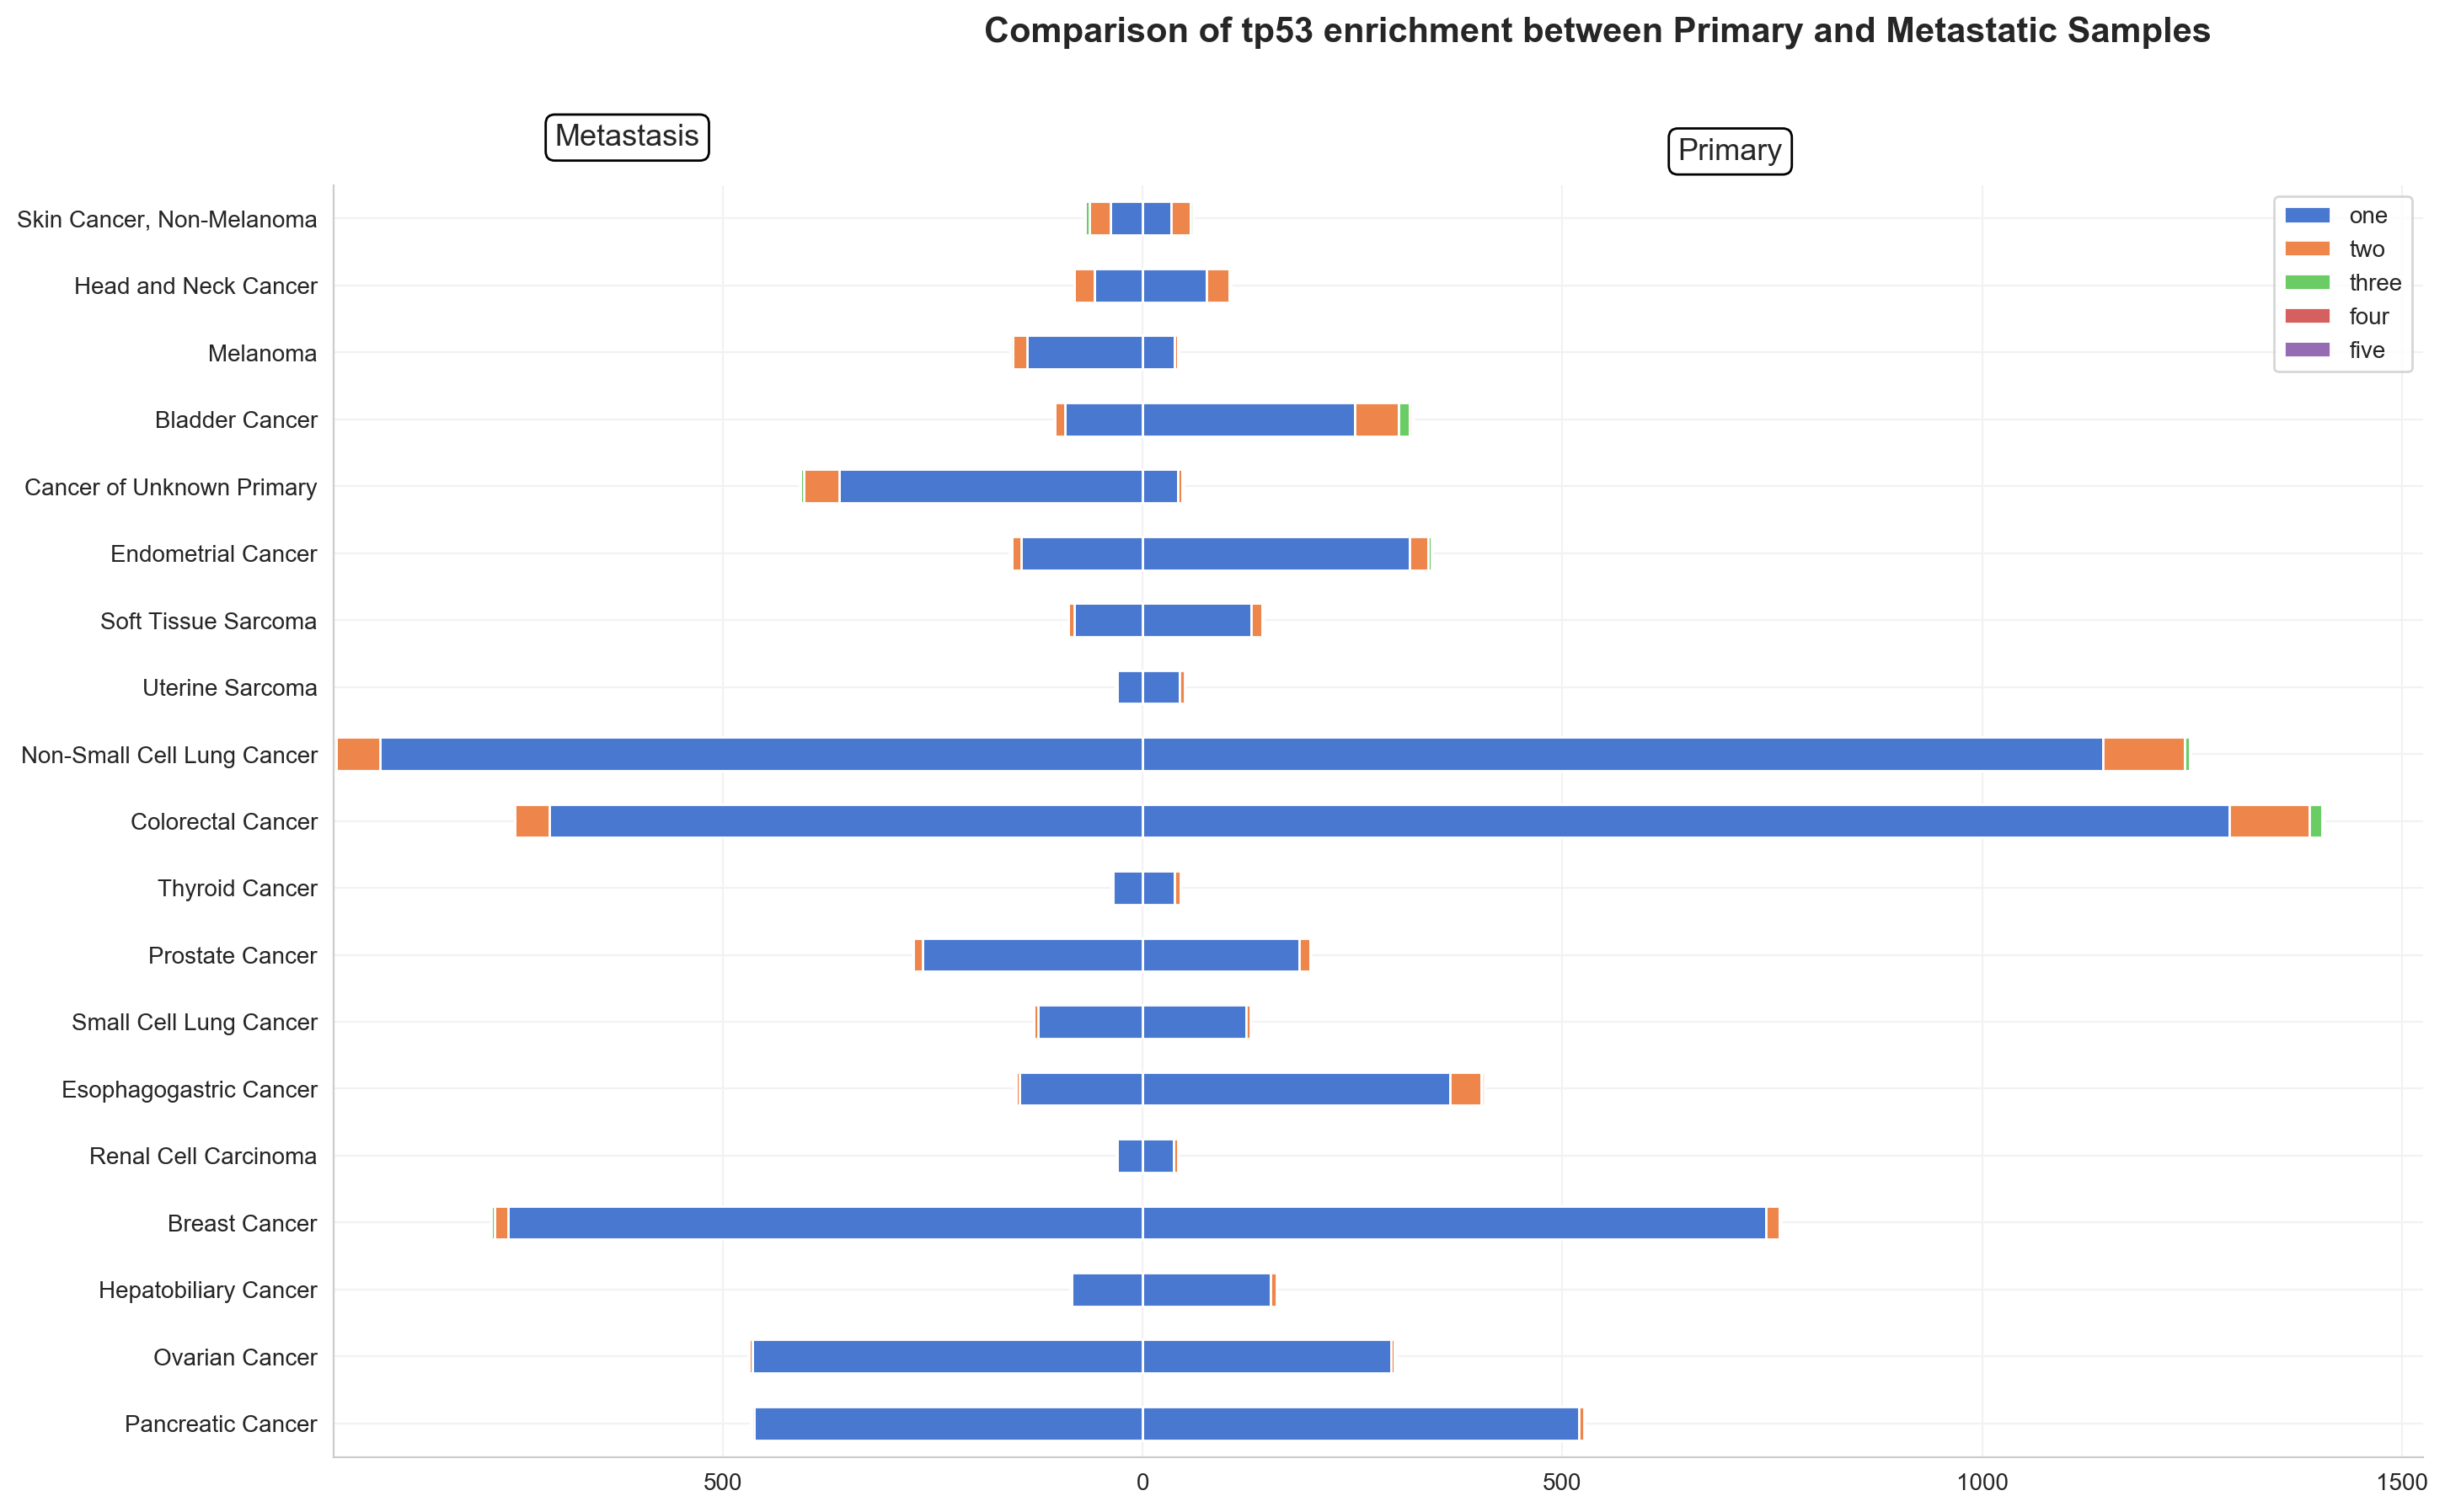

In [133]:
from itertools import cycle, islice
from matplotlib.patches import Patch

sns.set_style("whitegrid", {'grid.color': '0.95'})
my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 5))
fig, ax = plt.subplots()
fig.suptitle('Comparison of tp53 enrichment between Primary and Metastatic Samples',weight='bold', fontsize=15)
COUNT[['one_', 'two_', 'three_','four_','five_', 'one', 'two', 'three','four','five']].plot(kind = 'barh', stacked=True, figsize = (20,10), ax=ax, yticks=[], color= my_colors )
plt.legend(fontsize='small', ncol=1)
#ax.set_xlabel(xlabel)
#ax.set_ylabel(ylabel)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
custom_legend = [ Patch(facecolor=my_colors[0], label='one'),
                Patch(facecolor=my_colors[1], label='two'),
                Patch(facecolor=my_colors[2], label='three'),
                Patch(facecolor=my_colors[3], label='four'),
                Patch(facecolor=my_colors[4], label='five'),
               ]

ax.legend(handles=custom_legend)

ax.text(-700, 19, "Metastasis", size=13,
         ha="left", va="bottom",
         bbox=dict(boxstyle="round",
                   ec=(0., 0., 0.),
                   fc=(1., 1, 1.),
                   ))

ax.text(700,19, "Primary", size=13,
ha="center", va="center",
bbox=dict(boxstyle="round", ec=(0., 0., 0.),
                   fc=(1., 1., 1.),
                   ))

a = [1000, 500, 0, 500, 1000, 1500, 2000]
ax.set_xticklabels(a)

plt.show()

### All samples

In [26]:
# We compute the dataframe containing the number of hits per cancer
number_hits = get_numberhits('',100)
display(number_hits)

# We plot the table
get_mstacked_plot(number_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within MSK-Impact cohort (13 163 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10),
                  labels = list(number_hits['ratio']),
                  horiz=True)

,0
count,1
Cancer_Type,
Tubular Adenoma of the Colon,1
CNS Cancer,1
Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach,1
Undifferentiated Embryonal Sarcoma of the Liver,2
Peripheral Nervous System,2
Penile Cancer,2
Choroid Plexus Tumor,2
Sex Cord Stromal Tumor,3


KeyError: "['one' 'two' 'three' 'four' 'five'] not in index"

---
We see that a few cancers are enriched in multiple hits, such as **Glioma**, **Bladder Cancer** or **Head and Neck Cancer** while **Ovarian** or **Pancreatic Cancer** have barely no multiple hits.

Let's take a look at the ratio of multiple hits over single hits for each cancer to really see the enrichment.

---

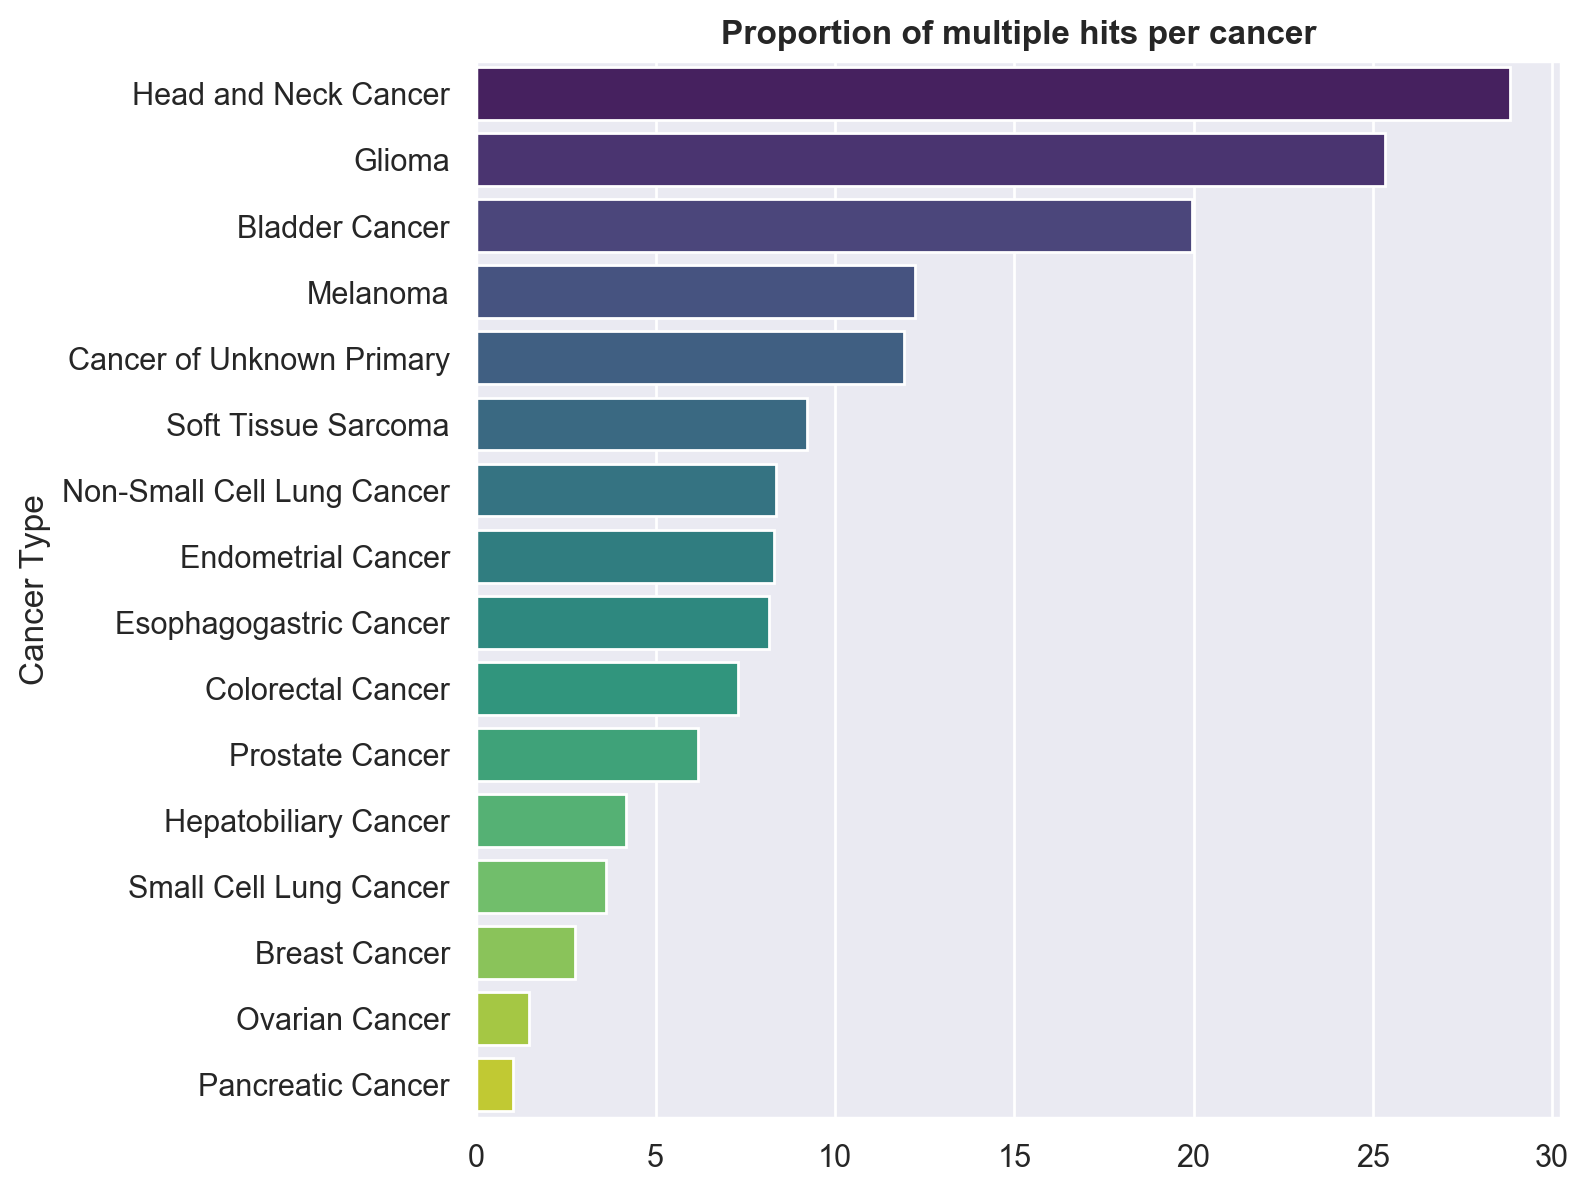

In [414]:
# we sort by ratio
number_hits = number_hits.sort_values(by=['ratio'], ascending=False)
#plot
get_ploth(number_hits.index, 
          'ratio', 
          number_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer',
          figsize=(7,7), 
          perc=False)

### Primary Samples

,one,two,three,four,five,ratio
Cancer_Type,,,,,,
Pancreatic Cancer,515.0,4.0,0.0,0.0,0.0,0.77
Ovarian Cancer,291.0,4.0,2.0,0.0,0.0,2.02
Breast Cancer,696.0,17.0,1.0,1.0,0.0,2.66
Small Cell Lung Cancer,120.0,4.0,0.0,0.0,0.0,3.23
Hepatobiliary Cancer,150.0,8.0,0.0,0.0,0.0,5.06
Prostate Cancer,180.0,13.0,1.0,0.0,0.0,7.22
Endometrial Cancer,314.0,22.0,4.0,0.0,1.0,7.92
Colorectal Cancer,1274.0,97.0,15.0,2.0,0.0,8.21
Esophagogastric Cancer,355.0,32.0,2.0,3.0,0.0,9.44


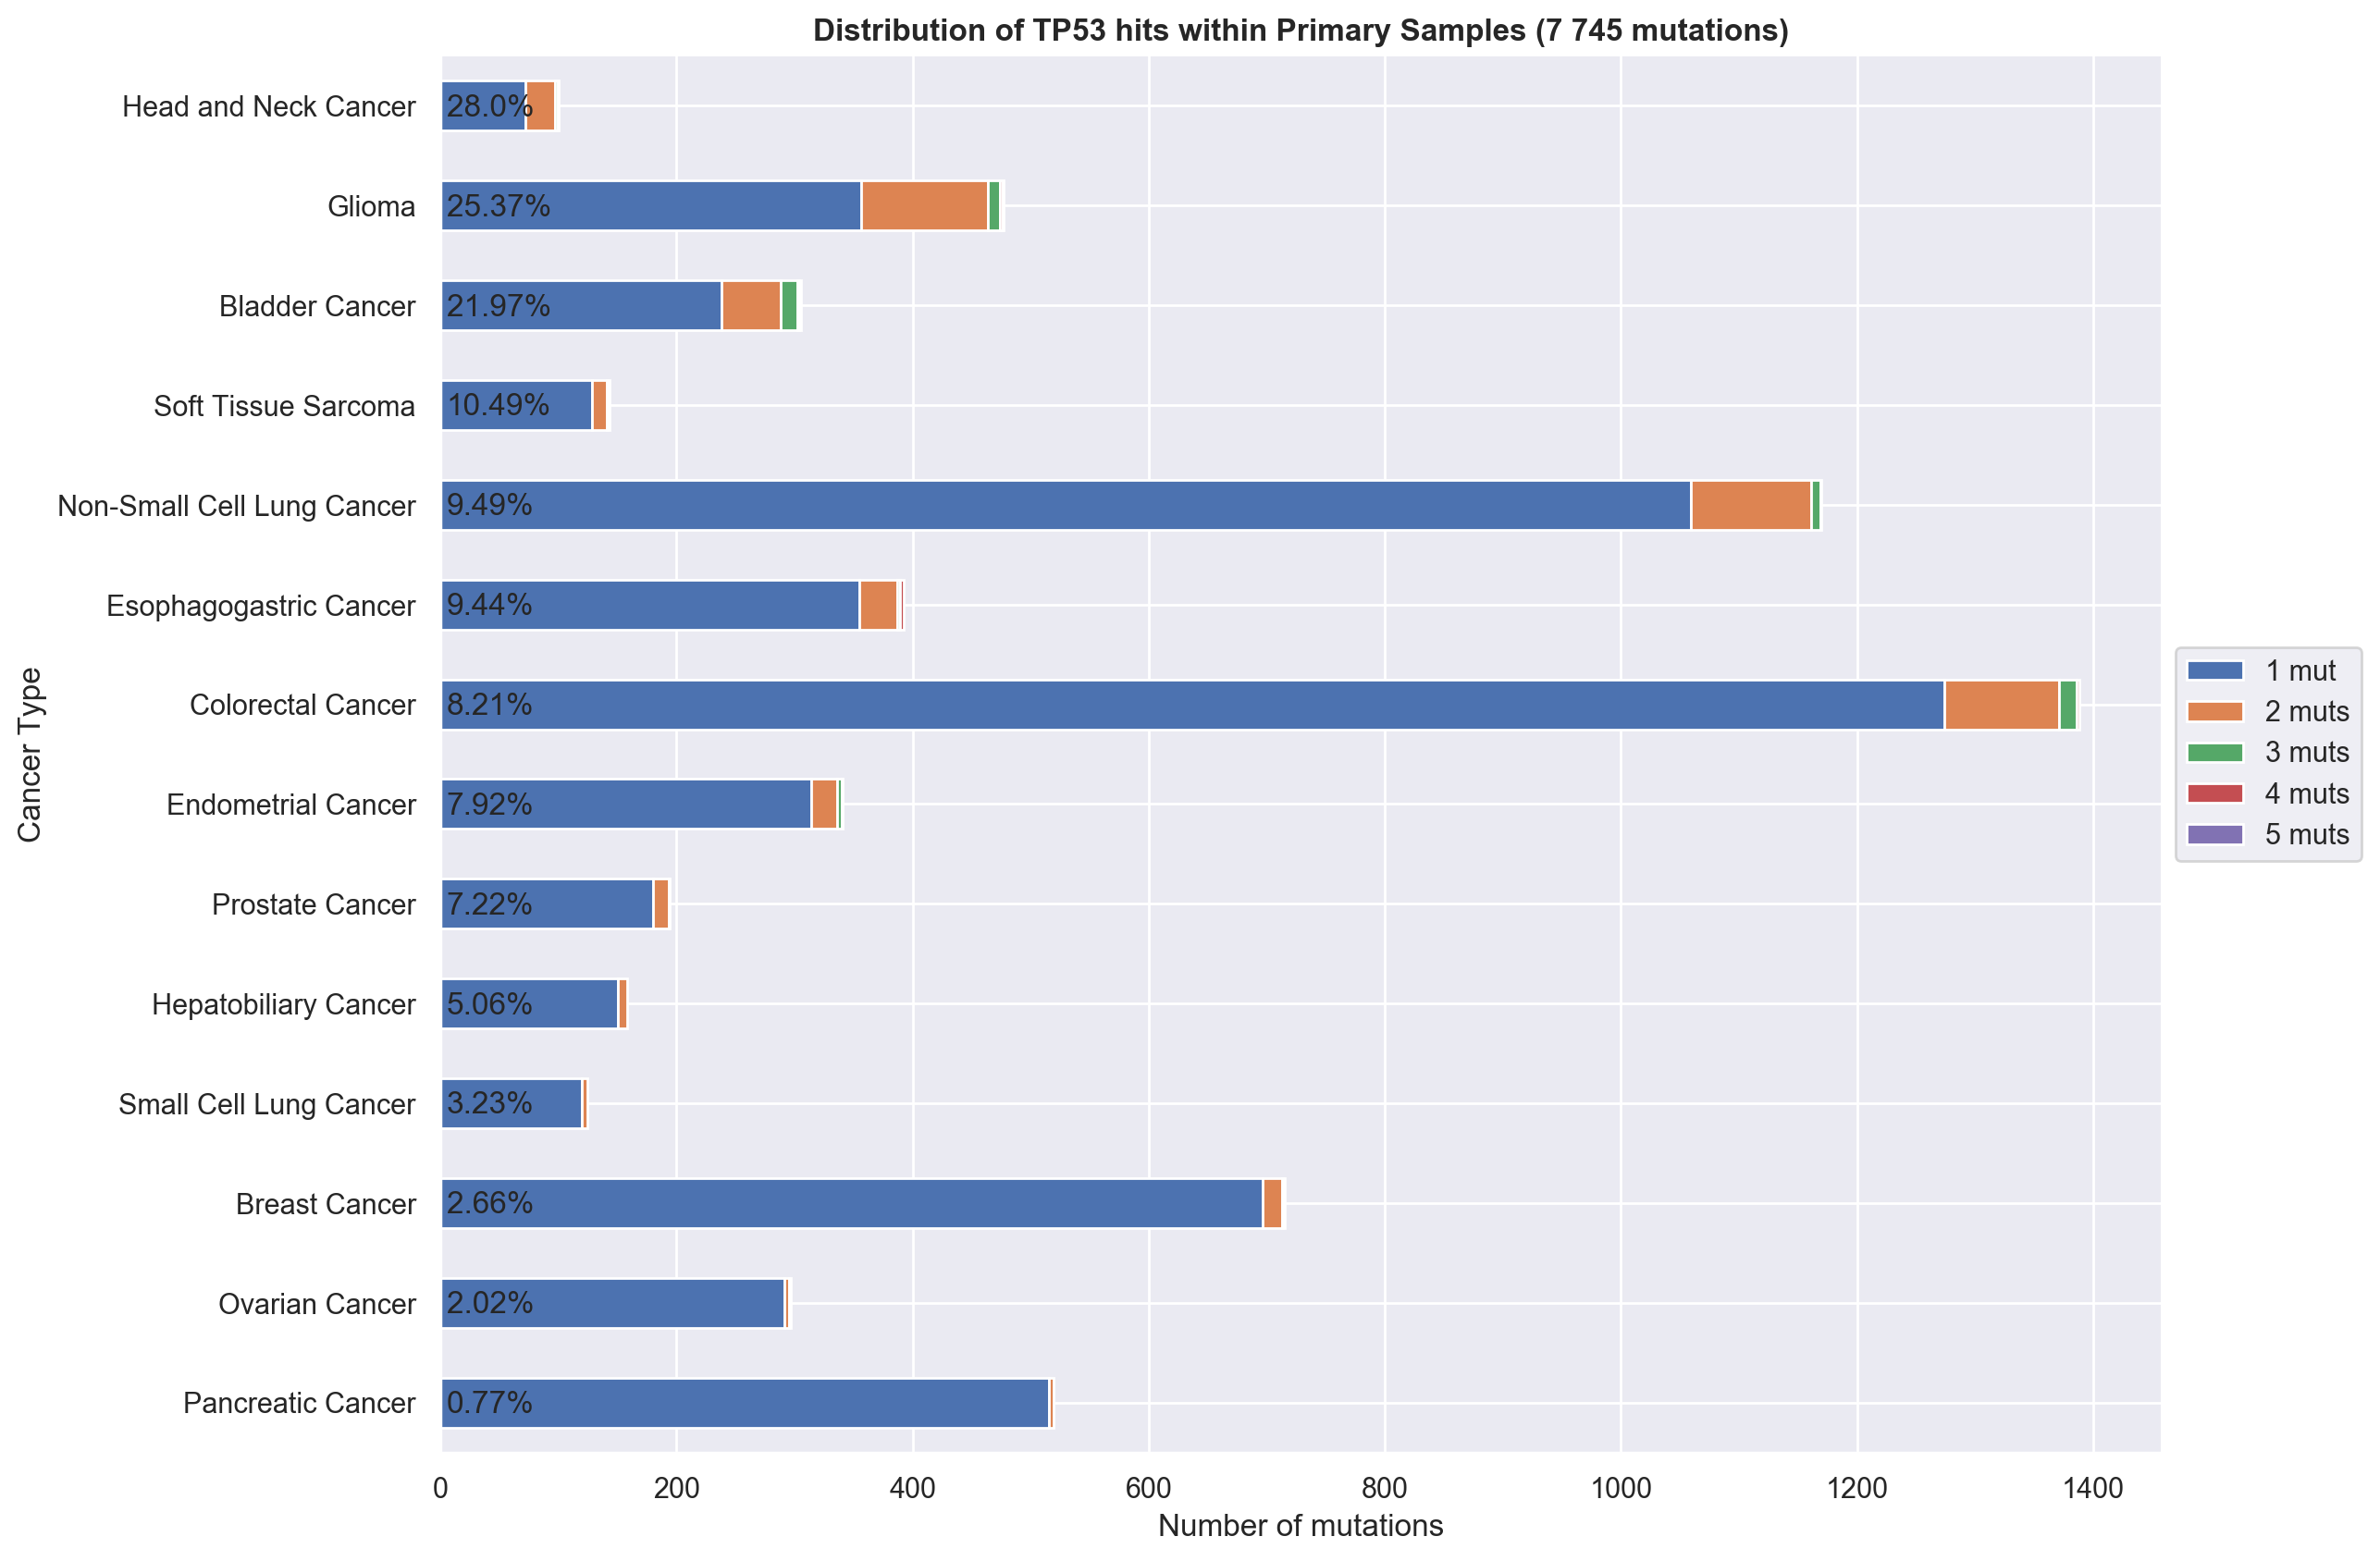

In [9]:
primary_hits = get_numberhits('Primary', 50)
display(primary_hits)

# We plot the table
get_mstacked_plot(primary_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within Primary Samples (7 745 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10),
                  labels = list(primary_hits['ratio']),
                  horiz=True)

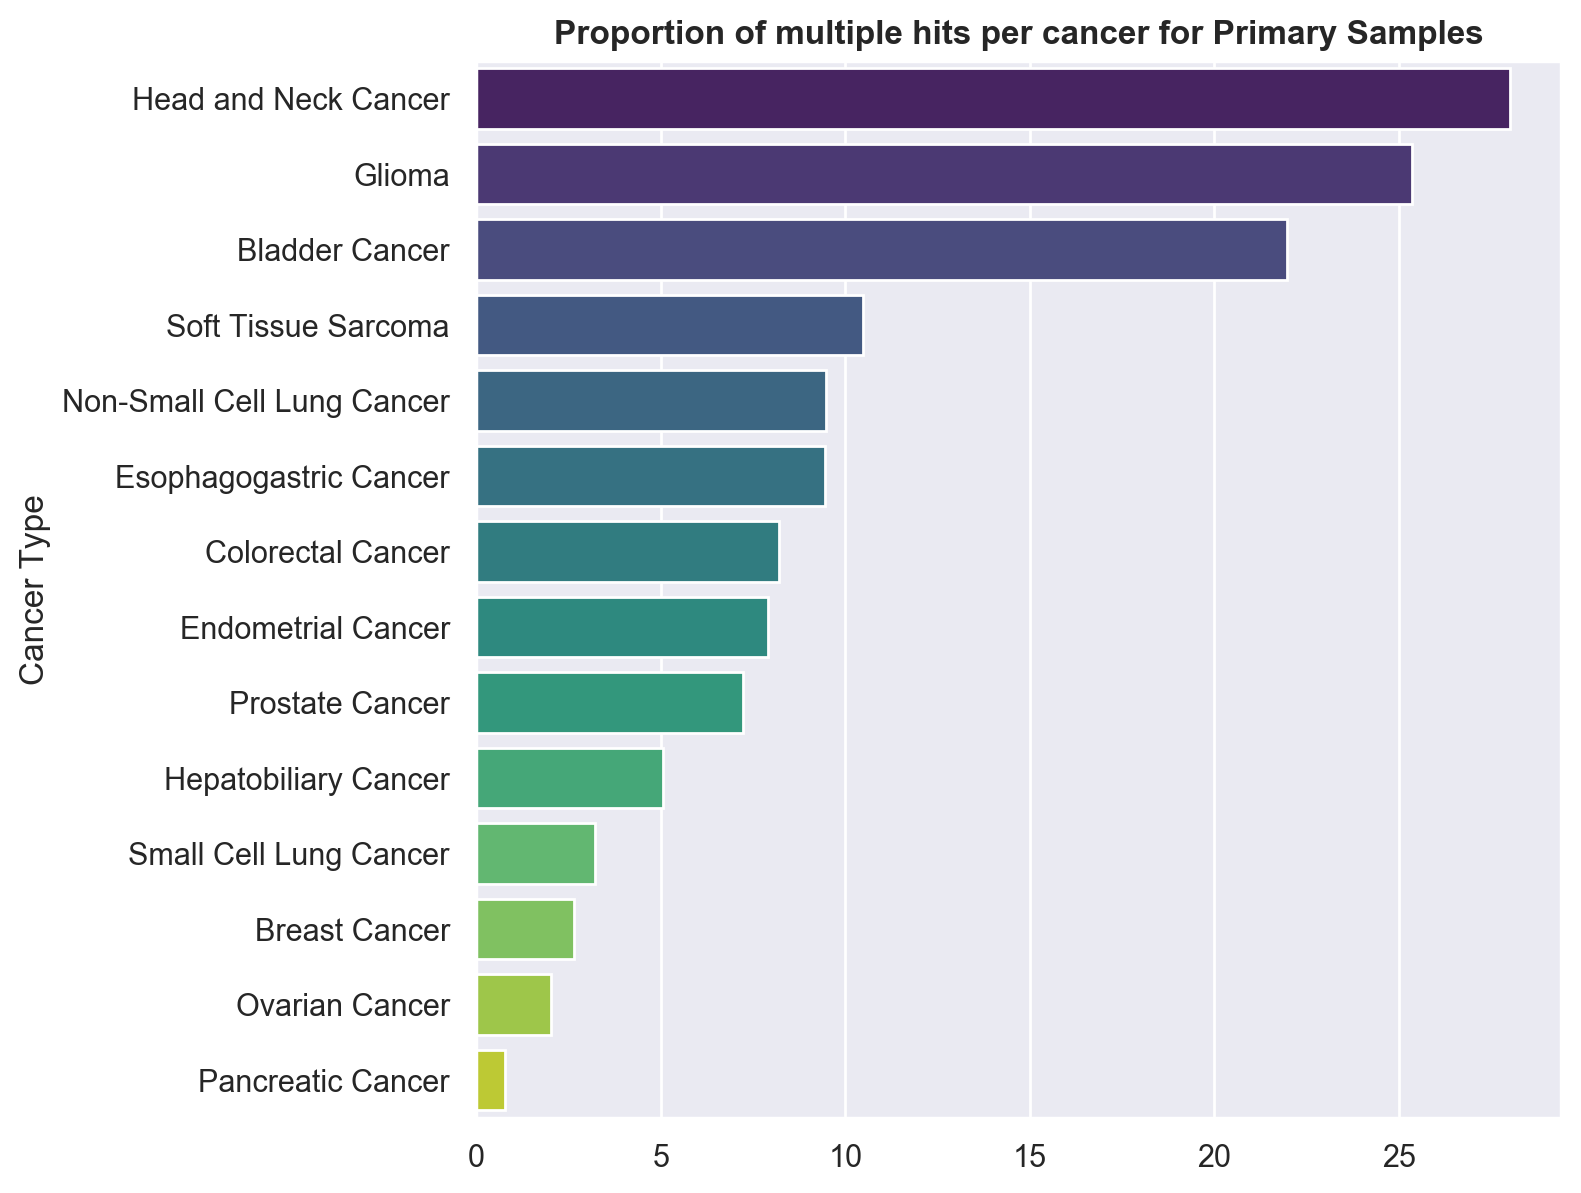

In [420]:
#sort
primary_hits = primary_hits.sort_values(by=['ratio'], ascending = False)
#plot
get_ploth(primary_hits.index, 
          'ratio',
          primary_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer for Primary Samples',
          figsize=(7,7),
          perc=False)

### Metastatis Samples

,one,two,three,four,five,ratio
Cancer_Type,,,,,,
Pancreatic Cancer,451.0,2.0,1.0,0.0,0.0,0.66
Ovarian Cancer,450.0,4.0,1.0,0.0,0.0,1.10
Hepatobiliary Cancer,79.0,1.0,1.0,0.0,0.0,2.47
Breast Cancer,657.0,14.0,4.0,0.0,0.0,2.67
Esophagogastric Cancer,131.0,4.0,1.0,0.0,0.0,3.68
Small Cell Lung Cancer,119.0,5.0,0.0,0.0,0.0,4.03
Prostate Cancer,214.0,11.0,1.0,0.0,0.0,5.31
Colorectal Cancer,660.0,37.0,1.0,0.0,0.0,5.44
Non-Small Cell Lung Cancer,826.0,46.0,3.0,0.0,0.0,5.60


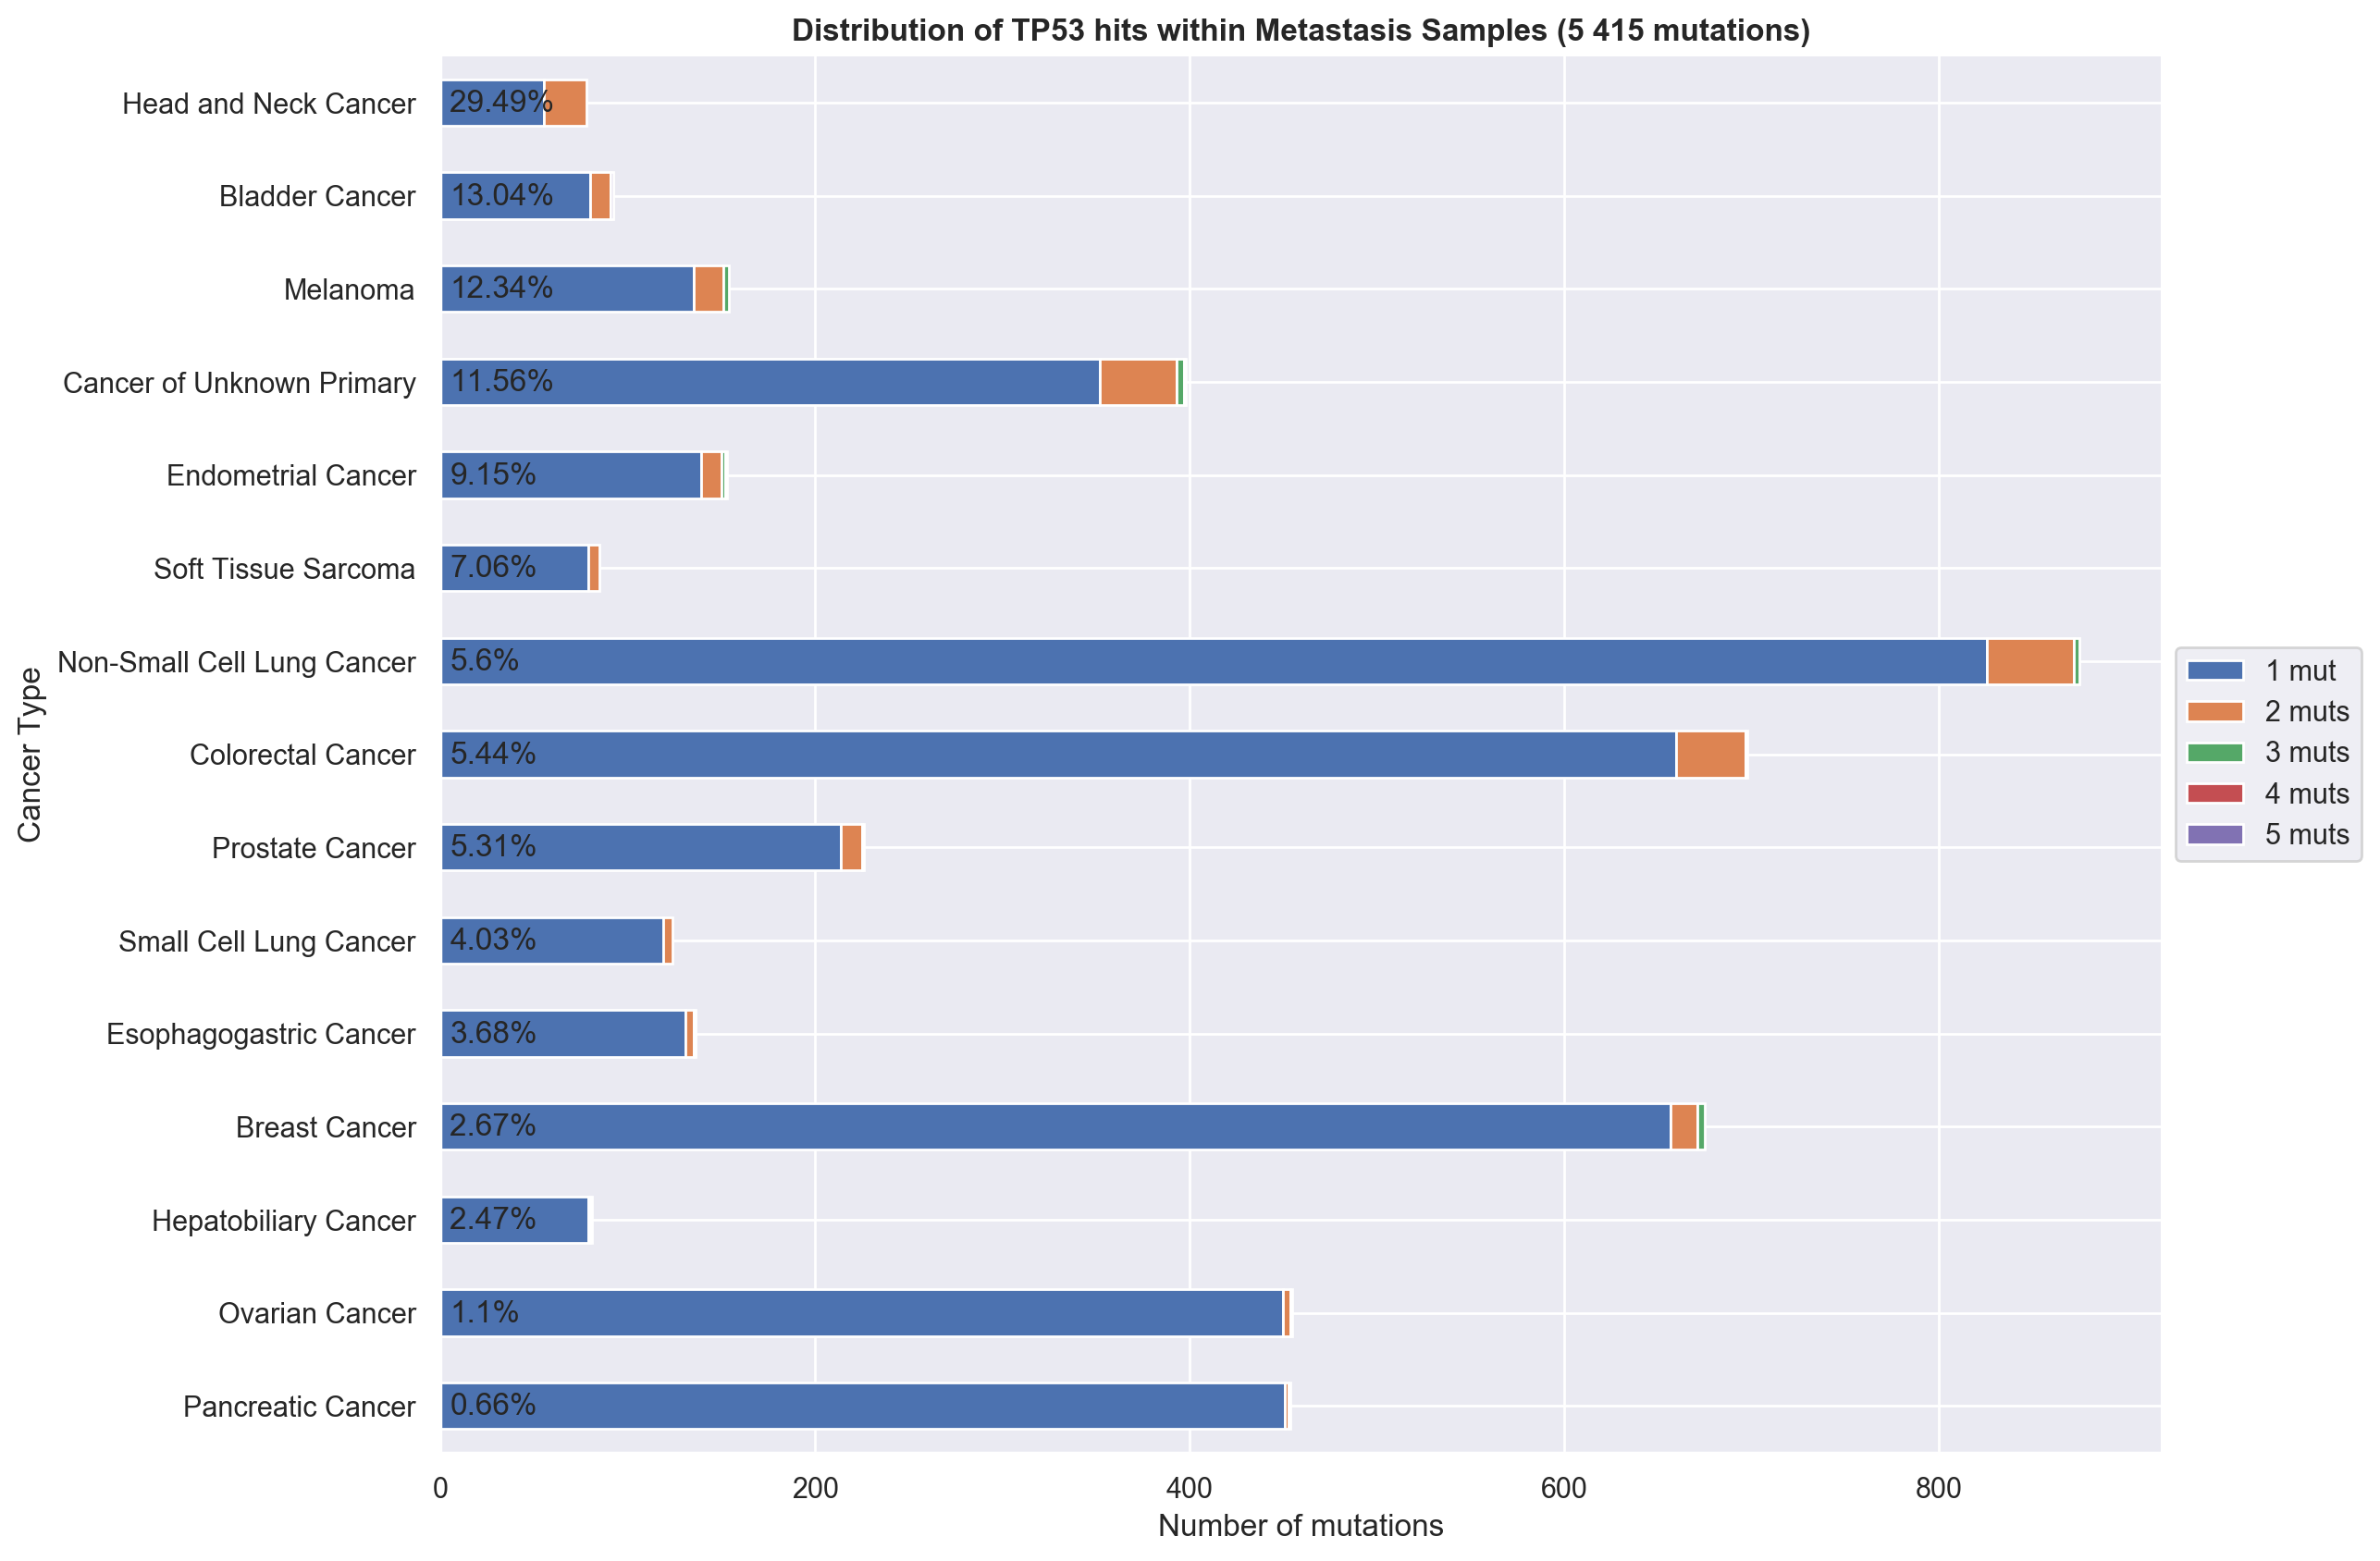

In [7]:
metastasis_hits = get_numberhits('Metastasis', 50)
display(metastasis_hits)

# We plot the table
get_mstacked_plot(metastasis_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within Metastasis Samples (5 415 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10), 
                  labels = list(metastasis_hits['ratio']),
                  horiz=True)

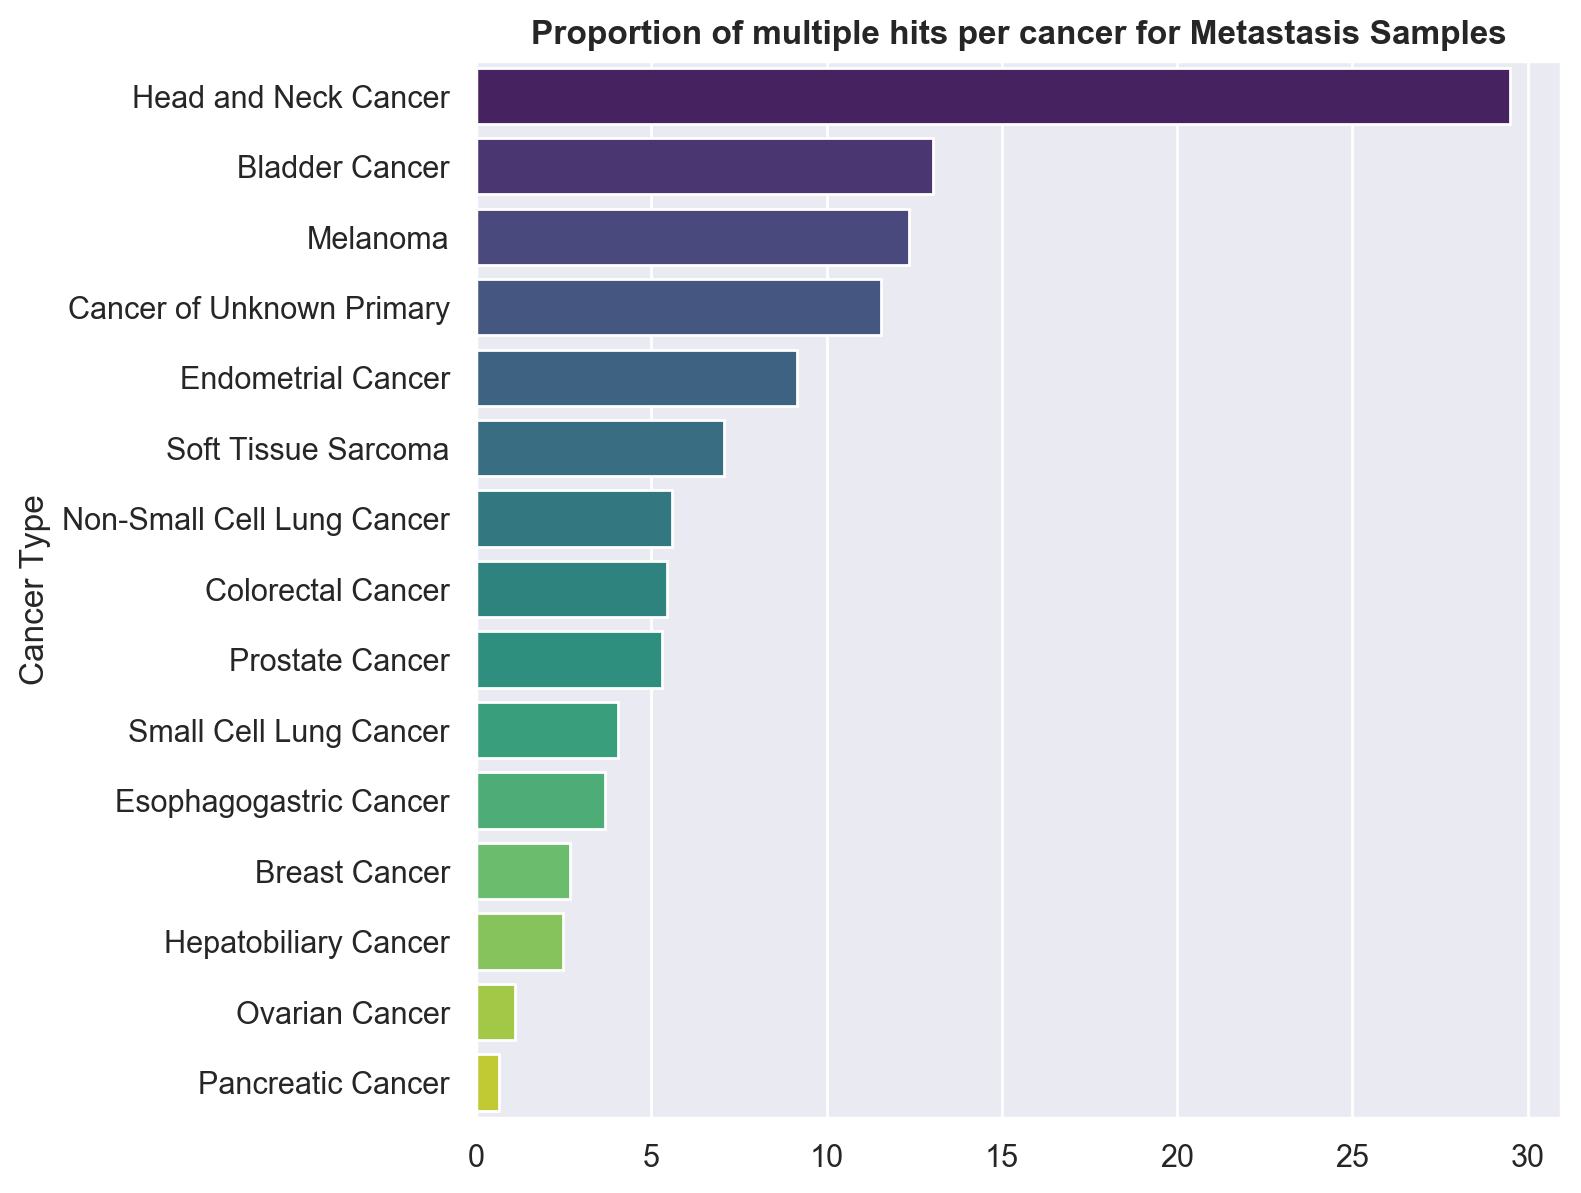

In [428]:
#sort
metastasis_hits = metastasis_hits.sort_values(by=['ratio'], ascending = False)
#plot
get_ploth(metastasis_hits.index, 
          'ratio', 
          metastasis_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer for Metastasis Samples',
          figsize=(7,7), 
          perc=False)

---
*Remarks:*
* **Glioma**: almost only Primary Samples (477 / 501 patients) but high ratio 25.3 %
* **Head and Neck Cancer** has the highest ratio for all samples (~ 30 %) but only 176 patients
* **Bladder Cancer** has also high ratio in both samples (21 % and 13%)
* **NSCLC** and **CC** are the two most represented cancer: 2027 and 2081 patients. They have average sample type ratios
    - NSCLC: also enriched in multi hits in Primary Samples compared to Metastasis (~9 % against 4 %)
    - CC: same (8.2 againt 5.5)
* **Breast, Pancreatic and Ovarian Cancers** are  quite represented in the cohort (1 385, 969 and 751 patients) but have a very low sample type ratios 
    * &rarr; Breast Cancer: 2.7%  ;  Ovarian Cancer: 1.5 %  ;  Pancreatic Cancer: 1 %
---


## Purity, CCF, VAF Densities

In [27]:
#we filter out the duplicates
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')
maf_tp53_unique

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSp,Consequence,mutation_effect,cf,ccf_expected_copies,purity,t_var_freq,Tumor_Sample_Barcode,mut_key,Patient_Id,sample_mut_key,patient_mut_key,mut_spot,Sample_Id,Patient_Current_Age,Cancer_Type,Cancer_Type_Detailed,Ethnicity_Category,Sex,Overall_Survival_Months,Sample_Type,Primary_Tumor_Site
0,TP53,17,7578409,7578410,Missense_Mutation,DNP,CT,CT,TC,p.Arg174Glu,missense_variant,Likely Loss-of-function,0.315621,0.925,0.308886,0.168901,P-0027408-T01-IM6,17_7578409_CT_TC,P-0027408,P-0027408-T01-IM6_17_7578409_CT_TC,P-0027408_17_7578409_CT_TC,174,P-0027408-T01-IM6,67.0,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,Female,22.586,Metastasis,Lung
1,TP53,17,7577121,7577121,Missense_Mutation,SNP,G,G,A,p.Arg273Cys,missense_variant,Likely Loss-of-function,0.325590,0.812,0.384643,0.312169,P-0036909-T01-IM6,17_7577121_G_A,P-0036909,P-0036909-T01-IM6_17_7577121_G_A,P-0036909_17_7577121_G_A,273,P-0036909-T01-IM6,47.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Non-Spanish; Non-Hispanic,Female,13.644,Metastasis,Lung
2,TP53,17,7578442,7578442,Missense_Mutation,SNP,T,T,C,p.Tyr163Cys,missense_variant,Loss-of-function,0.832723,0.935,0.861984,0.845070,P-0023546-T01-IM6,17_7578442_T_C,P-0023546,P-0023546-T01-IM6_17_7578442_T_C,P-0023546_17_7578442_T_C,163,P-0023546-T01-IM6,50.0,Prostate Cancer,Prostate Neuroendocrine Carcinoma,Non-Spanish; Non-Hispanic,Male,4.800,Primary,Prostate
3,TP53,17,7578442,7578442,Missense_Mutation,SNP,T,T,C,p.Tyr163Cys,missense_variant,Loss-of-function,0.307591,1.000,0.567171,0.636735,P-0023546-T02-IM6,17_7578442_T_C,P-0023546,P-0023546-T02-IM6_17_7578442_T_C,P-0023546_17_7578442_T_C,163,P-0023546-T02-IM6,50.0,Prostate Cancer,Prostate Adenocarcinoma,Non-Spanish; Non-Hispanic,Male,4.800,Primary,Prostate
4,TP53,17,7578471,7578471,Frame_Shift_Del,DEL,G,G,-,p.Gly154AlafsTer16,frameshift_variant,Likely Loss-of-function,0.892744,1.000,0.890701,0.912621,P-0025997-T01-IM6,17_7578471_G_-,P-0025997,P-0025997-T01-IM6_17_7578471_G_-,P-0025997_17_7578471_G_-,154,P-0025997-T01-IM6,70.0,Cancer of Unknown Primary,Small Cell Carcinoma of Unknown Primary,Non-Spanish; Non-Hispanic,Female,0.000,Metastasis,Cancer of Unknown Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13882,TP53,17,7578291,7578291,Splice_Site,SNP,T,T,G,NaN,splice_acceptor_variant,Likely Loss-of-function,0.211973,1.000,0.220008,0.126382,P-0050748-T01-IM6,17_7578291_T_G,P-0050748,P-0050748-T01-IM6_17_7578291_T_G,P-0050748_17_7578291_T_G,NaN,P-0050748-T01-IM6,57.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,NaN,Male,0.460,Primary,Pancreas
13883,TP53,17,7578394,7578394,Missense_Mutation,SNP,T,T,A,p.His179Leu,missense_variant,Loss-of-function,0.824066,1.000,0.833058,0.757801,P-0050741-T01-IM6,17_7578394_T_A,P-0050741,P-0050741-T01-IM6_17_7578394_T_A,P-0050741_17_7578394_T_A,179,P-0050741-T01-IM6,46.0,Small Cell Lung Cancer,Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,Male,1.282,Metastasis,Lung
13884,TP53,17,7577570,7577570,Missense_Mutation,SNP,C,C,T,p.Met237Ile,missense_variant,Likely Loss-of-function,0.254038,0.937,0.305687,0.168975,P-0050747-T01-IM6,17_7577570_C_T,P-0050747,P-0050747-T01-IM6_17_7577570_C_T,P-0050747_17_7577570_C_T,237,P-0050747-T01-IM6,72.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,NaN,Female,NaN,Primary,Pancreas
13885,TP53,17,7578208,7578208,Missense_Mutation,SNP,T,T,C,p.His214Arg,missense_variant,Likely Loss-of-function,1.000000,NaN,NaN,0.082168,P-0050652-T01-IM6,17_7578208_T_C,P-0050652,P-0050652-T01-IM6_17_7578208_T_C,P-0050652_17_7578208_T_C,214,P-0050652-T01-IM6,56.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,Non-Spanish; Non-Hispanic,Male,1.085,Primary,Pancreas


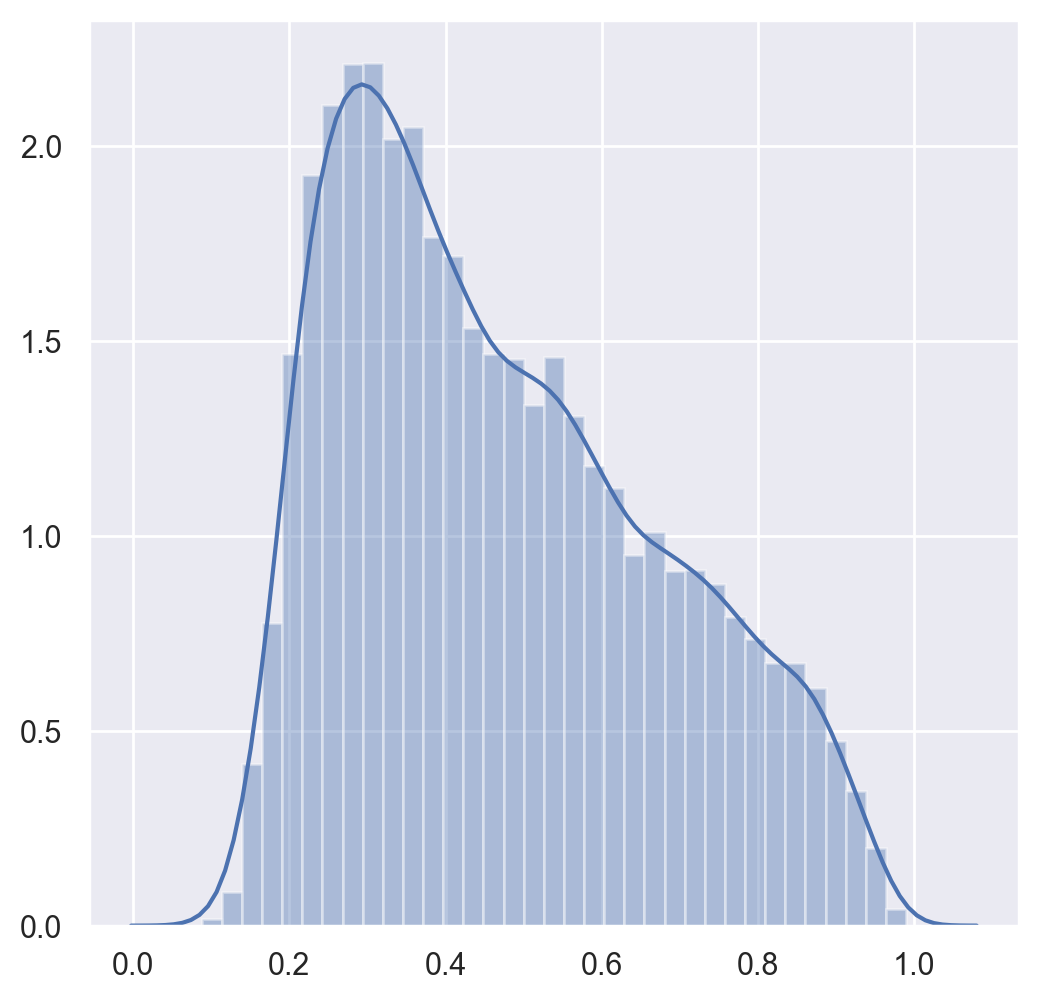

In [28]:
ax = sns.distplot(maf_tp53_unique[['purity']])

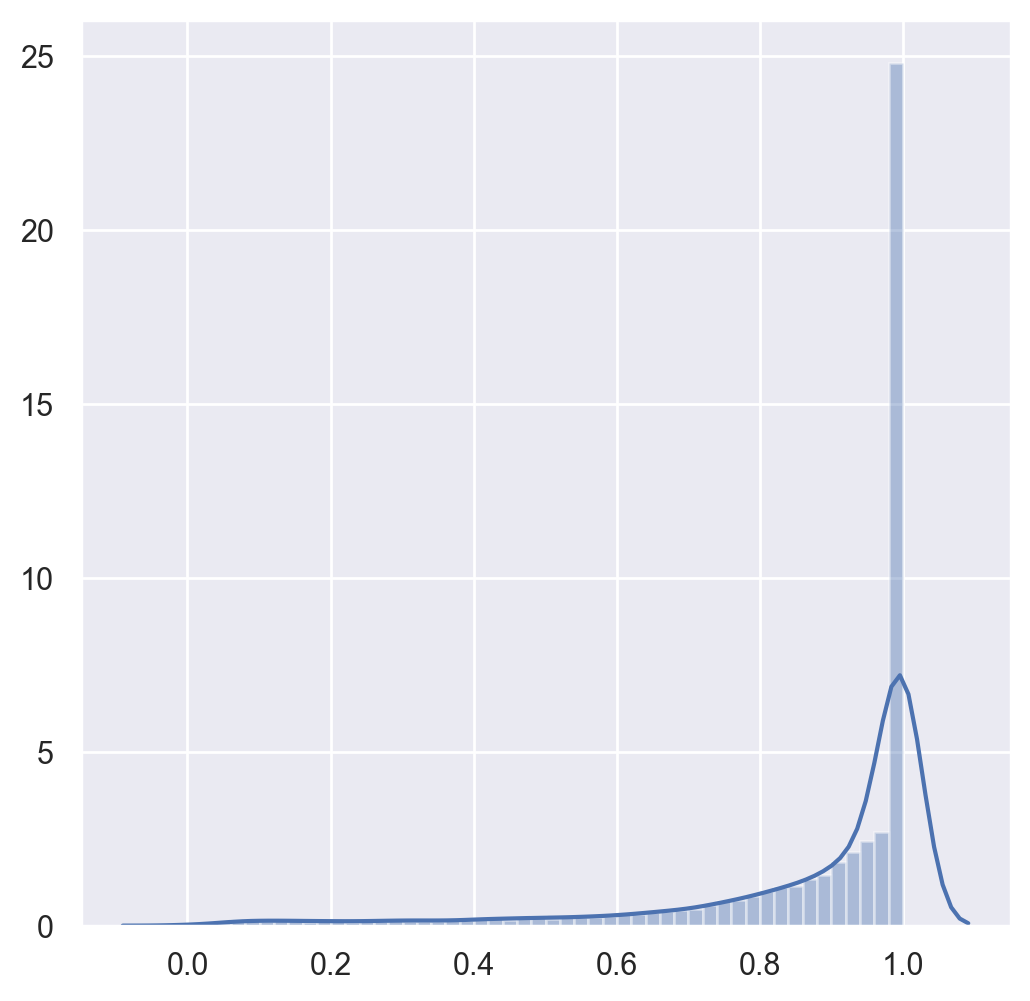

In [29]:
ax = sns.distplot(maf_tp53_unique[['ccf_expected_copies']])

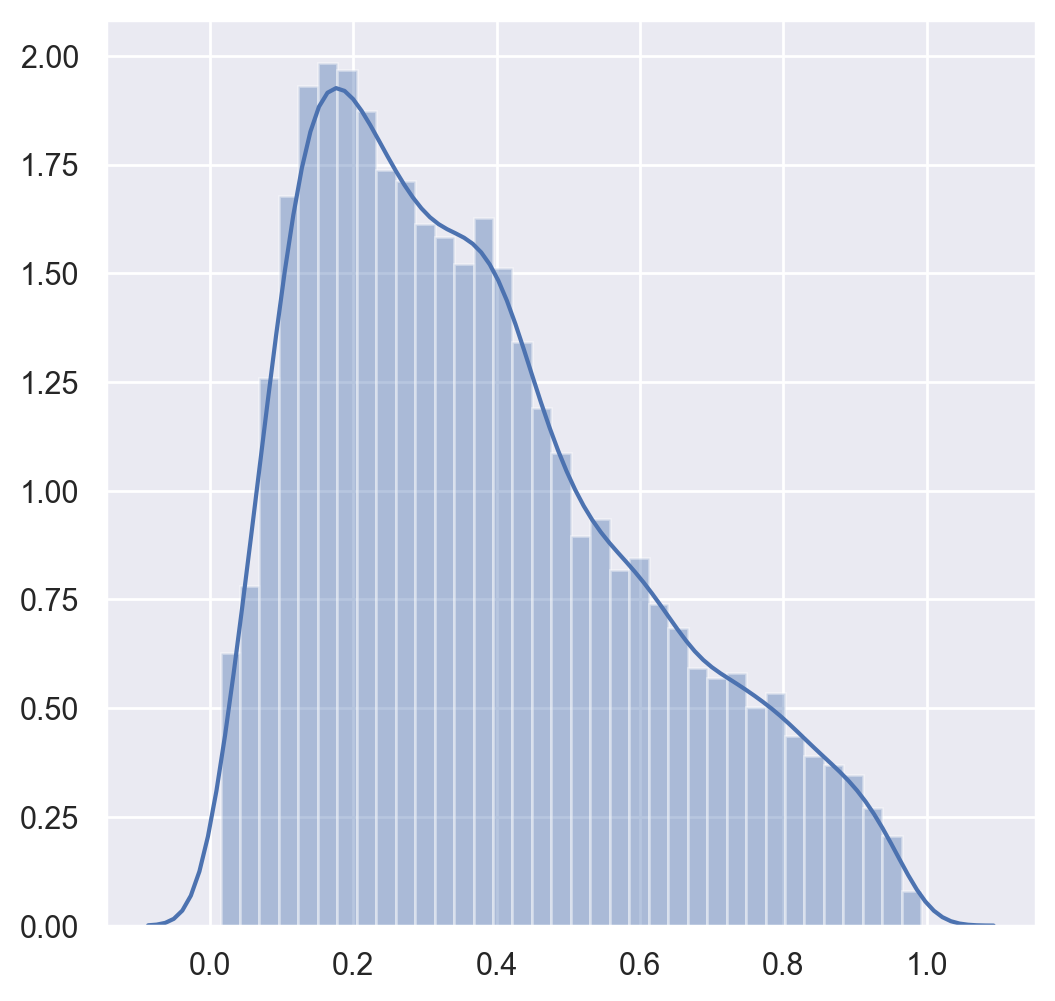

In [30]:
ax = sns.distplot(maf_tp53_unique[['t_var_freq']])

In [35]:
def plot_vaf_ccf_purity(kind, cancer_type, sample=None):
    # We load the table 
    maf_tp53 = pd.read_pickle(data_path + 'merged_data/maf_tp53.pkl')
    #we filter out the duplicates
    maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')
    # We filter only the cancer we want
    maf_tp53_unique = maf_tp53_unique[maf_tp53_unique['Cancer_Type'] == cancer_type]
    if sample:
        # We filter on the sample
        maf_tp53_unique = maf_tp53_unique[maf_tp53_unique['Sample_Type'] == sample]
    # We plot
    ax = sns.distplot(maf_tp53_unique[[kind]])

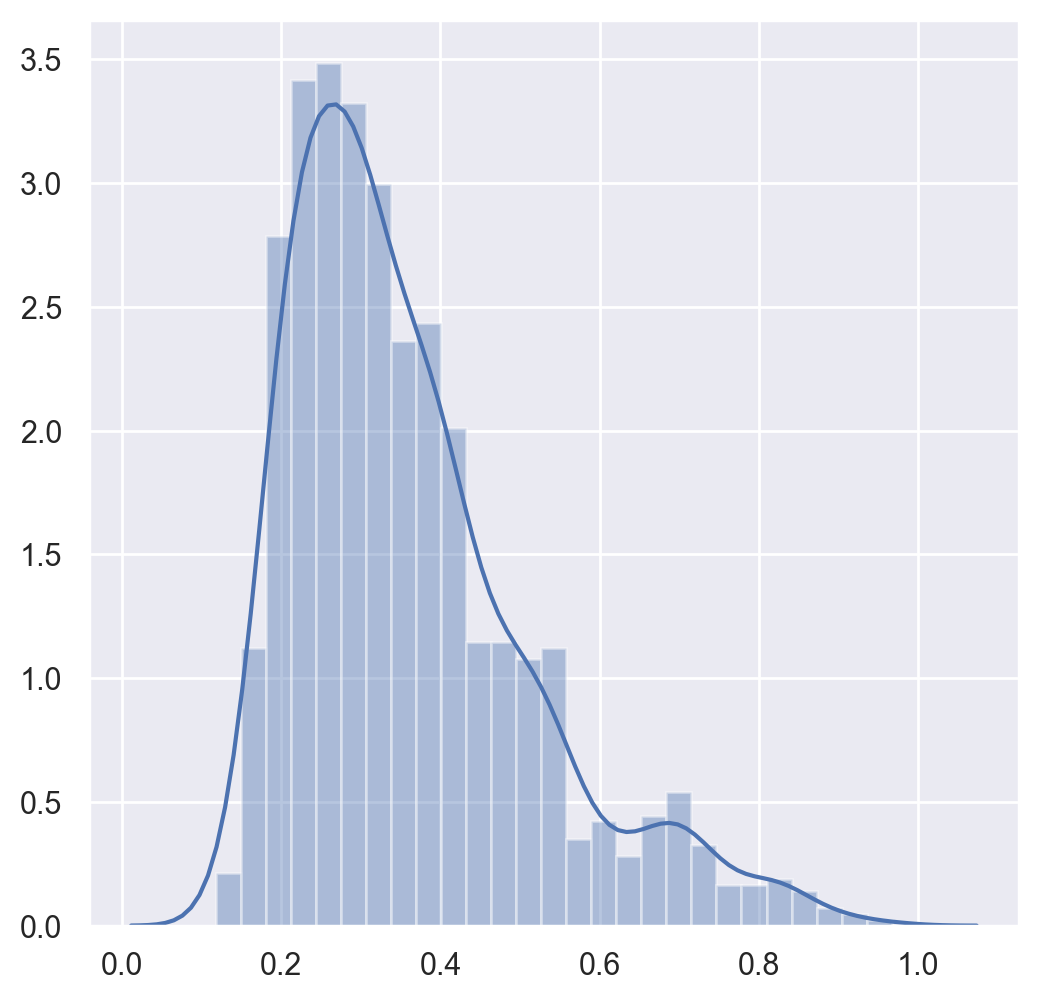

In [37]:
plot_vaf_ccf_purity('purity', 'Non-Small Cell Lung Cancer', 'Primary')

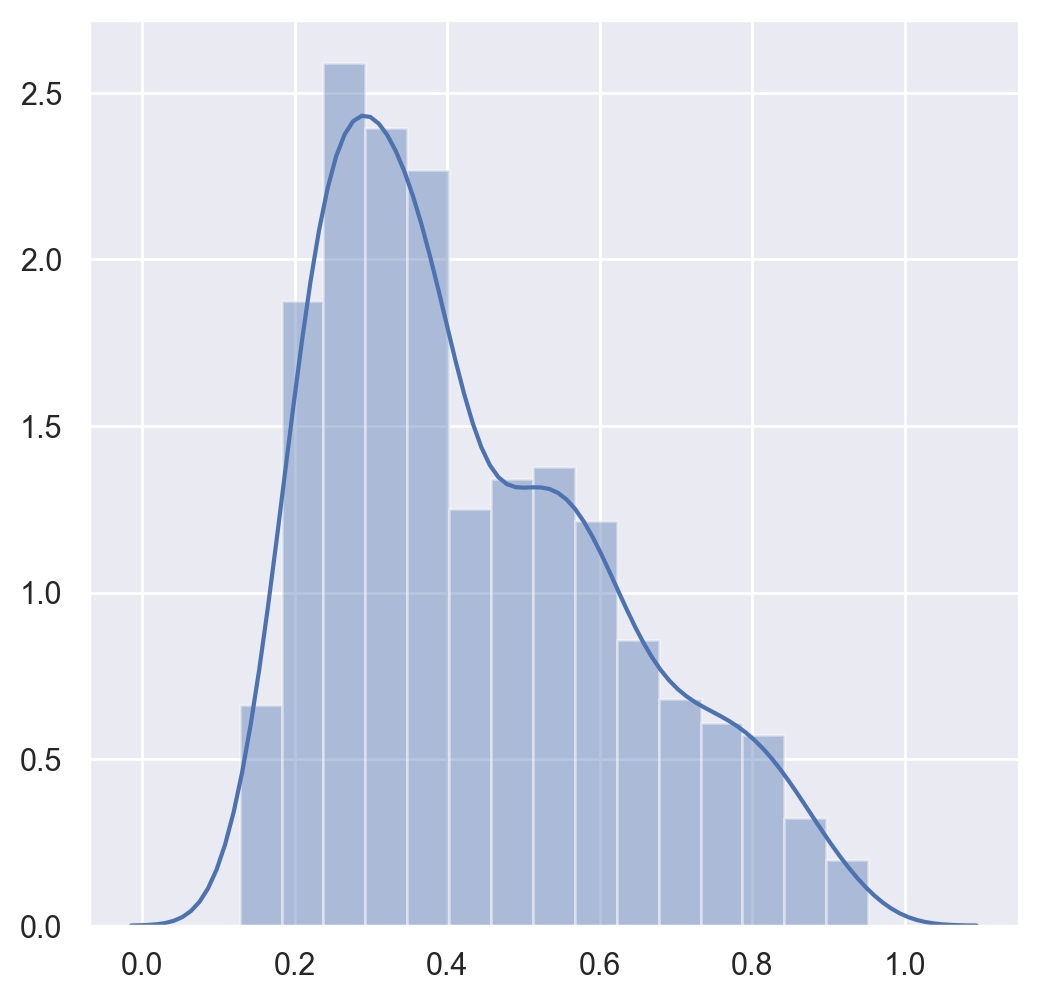

In [38]:
plot_vaf_ccf_purity('purity', 'Non-Small Cell Lung Cancer', 'Metastasis')

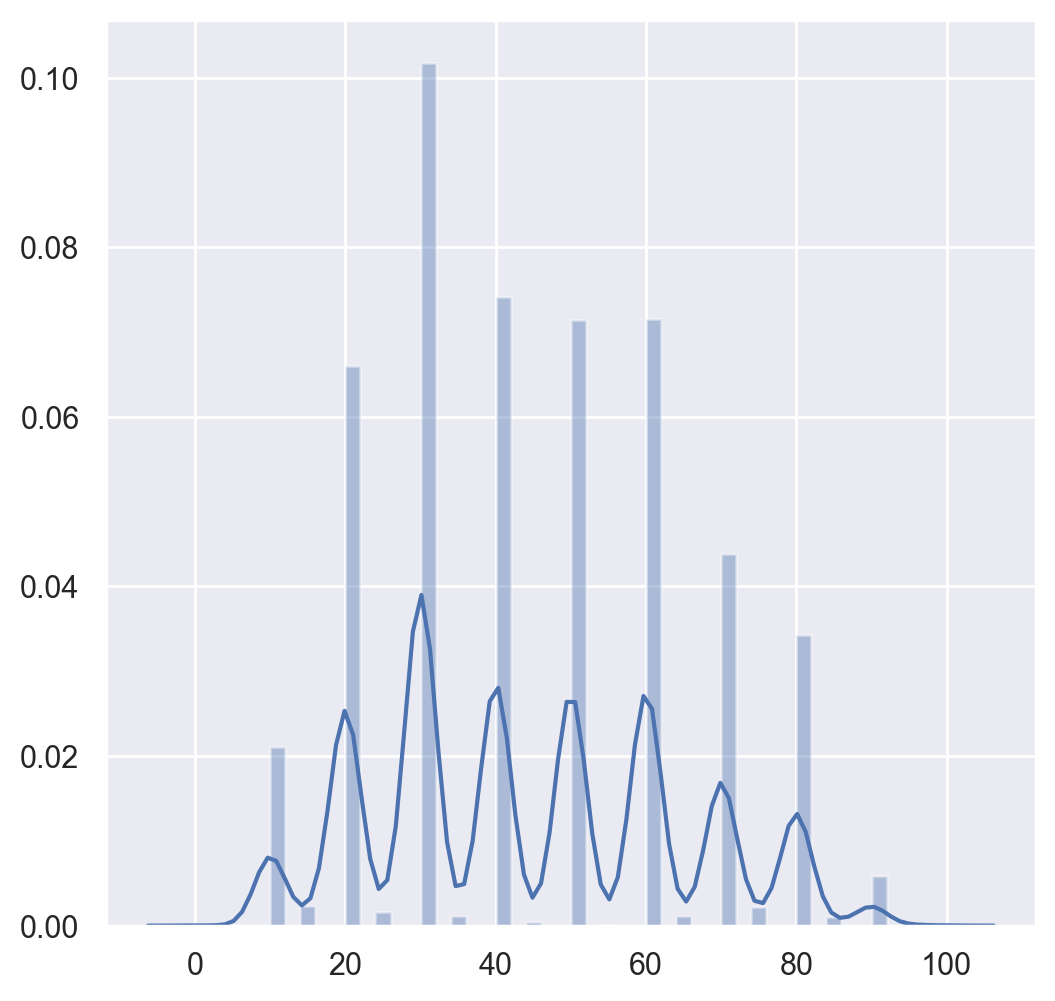

In [39]:
# We load the table 
maf_cohort = pd.read_pickle(data_path + 'merged_data/maf_cohort.pkl')
#we filter out the duplicates
maf_cohort_unique = maf_cohort.drop_duplicates('sample_mut_key')

# We plot
ax = sns.distplot(maf_cohort_unique[['purity']])